In [1]:
import os
import sys
sys.path.insert(0, "..")
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Load dataframes
suppress_rule_df = pd.read_csv("../../_dump/theory_attacks/theory_attack_suppress_rule.csv")
knowledge_amnesia_df = pd.read_csv("../../_dump/theory_attacks/theory_attack_knowledge_amnesia.csv")

In [3]:
suppress_rule_df.columns

Index(['Unnamed: 0', 'reasoner_type', 'train_seed', 'num_vars', 'embed_dim',
       'num_repeats', 'raw_state_acc', 'adv_ns1_state_acc',
       'adv_ns2_state_acc', 'adv_ns3_state_acc', 'adv_ns1_attn_wts',
       'adv_ns2_attn_wts', 'adv_ns3_attn_wts', 'adv_ns1_attn_ratio',
       'adv_ns2_attn_ratio', 'adv_ns3_attn_ratio'],
      dtype='object')

In [4]:
def get_col_as_np(df, tgt_col_name, filter_kvs = [], sort_by="num_repeats"):
    for k, v in filter_kvs:
        df = df[df[k].eq(v)]
    df = df.sort_values(by=[sort_by])
    x = df[sort_by].to_numpy()
    y = df[tgt_col_name].to_numpy()
    return x, y

Text(0.5, 1.0, 'Theory-based Attacks Against Learned Reasoners')

<Figure size 640x480 with 0 Axes>

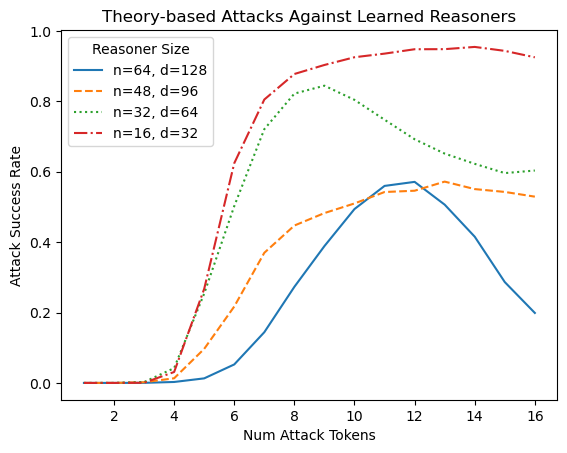

In [5]:
plt.clf()
fig = plt.figure(figsize=(6.4, 4.8))

x_64, y_64 = get_col_as_np(suppress_rule_df, "adv_ns3_state_acc",
    [("num_vars", 64), ("embed_dim", 128), ("reasoner_type", "learned")]
)

x_48, y_48 = get_col_as_np(suppress_rule_df, "adv_ns3_state_acc",
    [("num_vars", 48), ("embed_dim", 96), ("reasoner_type", "learned")]
)

x_32, y_32 = get_col_as_np(suppress_rule_df, "adv_ns3_state_acc",
    [("num_vars", 32), ("embed_dim", 64), ("reasoner_type", "learned")]
)

x_16, y_16 = get_col_as_np(suppress_rule_df, "adv_ns3_state_acc",
    [("num_vars", 16), ("embed_dim", 32), ("reasoner_type", "learned")]
)

plt.plot(x_64, y_64, linestyle="solid", label="n=64, d=128")
plt.plot(x_48, y_48, linestyle="dashed", label="n=48, d=96")
plt.plot(x_32, y_32, linestyle="dotted", label="n=32, d=64")
plt.plot(x_16, y_16, linestyle="dashdot", label="n=16, d=32")
plt.legend(loc="upper left", title="Reasoner Size")
plt.ylabel("Attack Success Rate")
plt.xlabel("Num Attack Tokens")
plt.title("Theory-based Attacks Against Learned Reasoners")

Text(0.5, 1.0, 'Attack Tokens Attention vs Suppressed Rule Attention')

<Figure size 640x480 with 0 Axes>

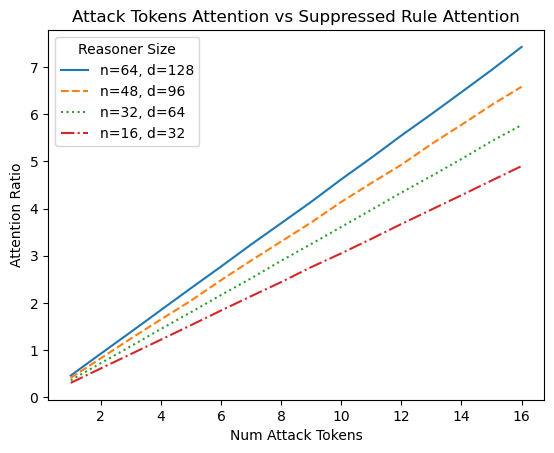

In [6]:
plt.clf()
fig = plt.figure(figsize=(6.4, 4.8))

x_64, y_64 = get_col_as_np(suppress_rule_df, "adv_ns1_attn_ratio",
    [("num_vars", 64), ("embed_dim", 128), ("reasoner_type", "learned")]
)

x_48, y_48 = get_col_as_np(suppress_rule_df, "adv_ns1_attn_ratio",
    [("num_vars", 48), ("embed_dim", 96), ("reasoner_type", "learned")]
)

x_32, y_32 = get_col_as_np(suppress_rule_df, "adv_ns1_attn_ratio",
    [("num_vars", 32), ("embed_dim", 64), ("reasoner_type", "learned")]
)

x_16, y_16 = get_col_as_np(suppress_rule_df, "adv_ns1_attn_ratio",
    [("num_vars", 16), ("embed_dim", 32), ("reasoner_type", "learned")]
)

plt.plot(x_64, y_64, linestyle="solid", label="n=64, d=128")
plt.plot(x_48, y_48, linestyle="dashed", label="n=48, d=96")
plt.plot(x_32, y_32, linestyle="dotted", label="n=32, d=64")
plt.plot(x_16, y_16, linestyle="dashdot", label="n=16, d=32")
plt.legend(loc="upper left", title="Reasoner Size")
plt.ylabel("Attention Ratio")
plt.xlabel("Num Attack Tokens")
plt.title("Attack Tokens Attention vs Suppressed Rule Attention")

In [7]:
# Knowledge Amnesia

Text(0.5, 1.0, 'Theory-based Attacks Against Learned Reasoners')

<Figure size 640x480 with 0 Axes>

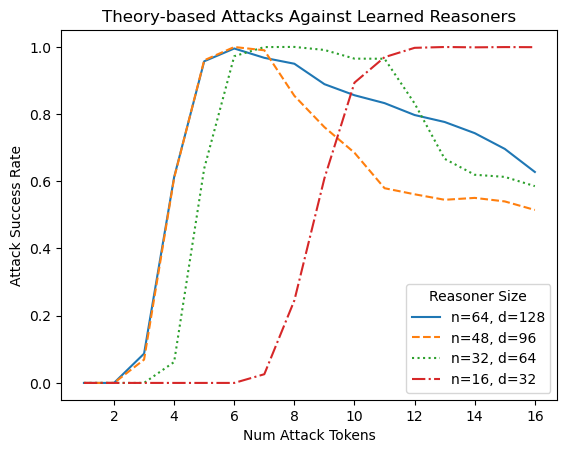

In [9]:
plt.clf()
fig = plt.figure(figsize=(6.4, 4.8))

x_64, y_64 = get_col_as_np(knowledge_amnesia_df, "adv_ns1_state_acc",
    [("num_vars", 64), ("embed_dim", 128), ("reasoner_type", "learned")]
)

x_48, y_48 = get_col_as_np(knowledge_amnesia_df, "adv_ns1_state_acc",
    [("num_vars", 48), ("embed_dim", 96), ("reasoner_type", "learned")]
)

x_32, y_32 = get_col_as_np(knowledge_amnesia_df, "adv_ns1_state_acc",
    [("num_vars", 32), ("embed_dim", 64), ("reasoner_type", "learned")]
)

x_16, y_16 = get_col_as_np(knowledge_amnesia_df, "adv_ns1_state_acc",
    [("num_vars", 16), ("embed_dim", 32), ("reasoner_type", "learned")]
)

plt.plot(x_64, y_64, linestyle="solid", label="n=64, d=128")
plt.plot(x_48, y_48, linestyle="dashed", label="n=48, d=96")
plt.plot(x_32, y_32, linestyle="dotted", label="n=32, d=64")
plt.plot(x_16, y_16, linestyle="dashdot", label="n=16, d=32")
plt.legend(loc="lower right", title="Reasoner Size")
plt.ylabel("Attack Success Rate")
plt.xlabel("Num Attack Tokens")
plt.title("Theory-based Attacks Against Learned Reasoners")

Text(0.5, 1.0, 'Attack Tokens Attention vs Suppressed Rule Attention')

<Figure size 640x480 with 0 Axes>

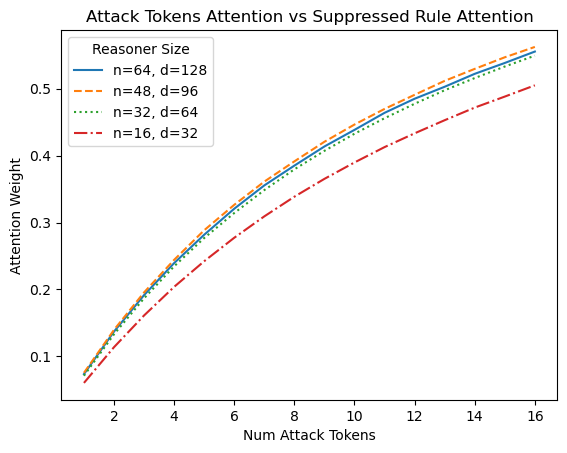

In [12]:
plt.clf()
fig = plt.figure(figsize=(6.4, 4.8))

x_64, y_64 = get_col_as_np(knowledge_amnesia_df, "adv_ns1_attn_wts",
    [("num_vars", 64), ("embed_dim", 128), ("reasoner_type", "learned")]
)

x_48, y_48 = get_col_as_np(knowledge_amnesia_df, "adv_ns1_attn_wts",
    [("num_vars", 48), ("embed_dim", 96), ("reasoner_type", "learned")]
)

x_32, y_32 = get_col_as_np(knowledge_amnesia_df, "adv_ns1_attn_wts",
    [("num_vars", 32), ("embed_dim", 64), ("reasoner_type", "learned")]
)

x_16, y_16 = get_col_as_np(knowledge_amnesia_df, "adv_ns1_attn_wts",
    [("num_vars", 16), ("embed_dim", 32), ("reasoner_type", "learned")]
)

plt.plot(x_64, y_64, linestyle="solid", label="n=64, d=128")
plt.plot(x_48, y_48, linestyle="dashed", label="n=48, d=96")
plt.plot(x_32, y_32, linestyle="dotted", label="n=32, d=64")
plt.plot(x_16, y_16, linestyle="dashdot", label="n=16, d=32")
plt.legend(loc="upper left", title="Reasoner Size")
plt.ylabel("Attention Weight")
plt.xlabel("Num Attack Tokens")
plt.title("Attack Tokens Attention vs Suppressed Rule Attention")

In [19]:
suppress_rule_df.columns.values

array(['Unnamed: 0', 'reasoner_type', 'train_seed', 'num_vars',
       'embed_dim', 'num_repeats', 'raw_state_acc', 'adv_ns1_state_acc',
       'adv_ns2_state_acc', 'adv_ns3_state_acc', 'adv_ns1_attn_wts',
       'adv_ns2_attn_wts', 'adv_ns3_attn_wts', 'adv_ns1_attn_ratio',
       'adv_ns2_attn_ratio', 'adv_ns3_attn_ratio'], dtype=object)

In [20]:
list(suppress_rule_df.columns.values)

['Unnamed: 0',
 'reasoner_type',
 'train_seed',
 'num_vars',
 'embed_dim',
 'num_repeats',
 'raw_state_acc',
 'adv_ns1_state_acc',
 'adv_ns2_state_acc',
 'adv_ns3_state_acc',
 'adv_ns1_attn_wts',
 'adv_ns2_attn_wts',
 'adv_ns3_attn_wts',
 'adv_ns1_attn_ratio',
 'adv_ns2_attn_ratio',
 'adv_ns3_attn_ratio']

In [27]:
ddd = {"c": 3, "a": 1, "b": 2}

In [29]:
list(ddd.keys())

['c', 'a', 'b']